In [12]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #ignore warnings


df = pd.read_csv('https://raw.githubusercontent.com/mlinsights/freemium/main/datasets/classification/bank-note-authentication/BankNote_Authentication.csv')
df.head()

X = df.iloc[:,0:4] #extract the features
y = df[['class']] #extract the target vector

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1234)#fix the random seed (to reproduce the results)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

k=3#set number of neighbours
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train,y_train)#train the classifier
#get model prediction on train set and test set
y_pred_train = knn_classifier.predict(X_train)
y_pred_test = knn_classifier.predict(X_test)

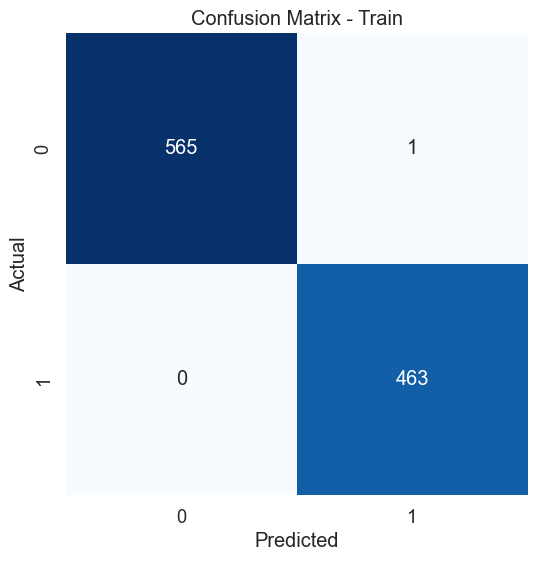

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00       566
     class_1       1.00      1.00      1.00       463

    accuracy                           1.00      1029
   macro avg       1.00      1.00      1.00      1029
weighted avg       1.00      1.00      1.00      1029



In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)

# Create heatmap - Test set
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train')
plt.show()

train_report = classification_report(y_train, y_pred_train, target_names=['class_0','class_1'])
print("Classification Report:\n", train_report)

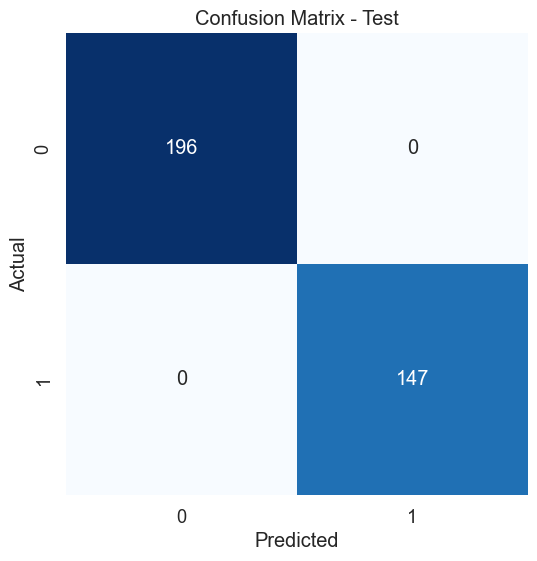

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00       196
     class_1       1.00      1.00      1.00       147

    accuracy                           1.00       343
   macro avg       1.00      1.00      1.00       343
weighted avg       1.00      1.00      1.00       343



In [16]:
# Create confusion matrix test set
cm_test = confusion_matrix(y_test, y_pred_test)
# Create heatmap - Test set
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test')
plt.show()

test_report = classification_report(y_test, y_pred_test, target_names=['class_0','class_1'])
print("Classification Report:\n", test_report)